**Step 1: Data Preprocessin**g
1.1 Import Libraries

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [ ]:
# Load Dataset

df = pd.read_csv('/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Handle Missing Values

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
#Encode Categorical Variables

labelencoder = LabelEncoder()
df_encoded = df_imputed.apply(lambda col: labelencoder.fit_transform(col) if col.dtype == 'object' else col)

In [ ]:
# Scale Numerical Variables

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

**Step 2: Exploratory Data Analysis (EDA)**
We'll analyze the dataset to understand few relationships between variables using visualization techniques.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


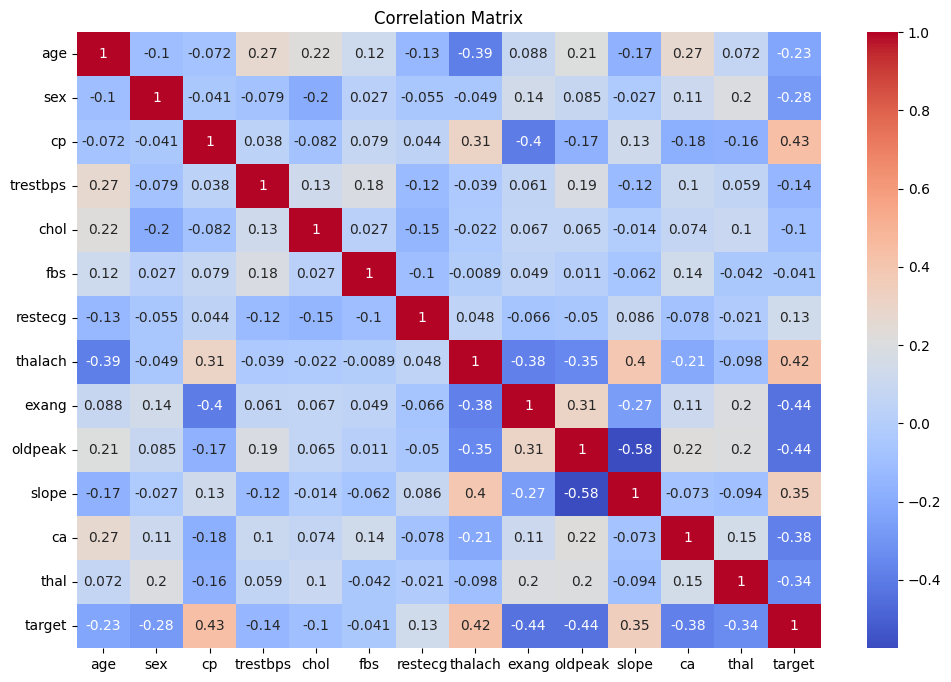

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


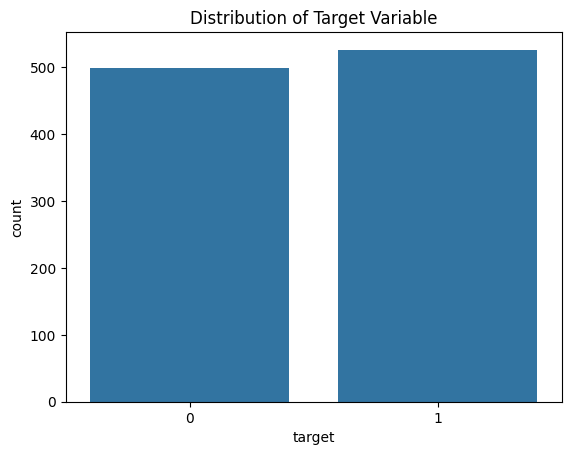

In [ ]:

# Distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Text(0, 0.5, 'Count')

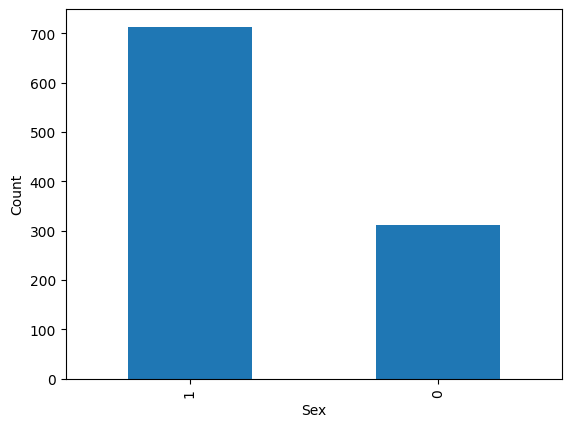

In [ ]:
df['sex'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

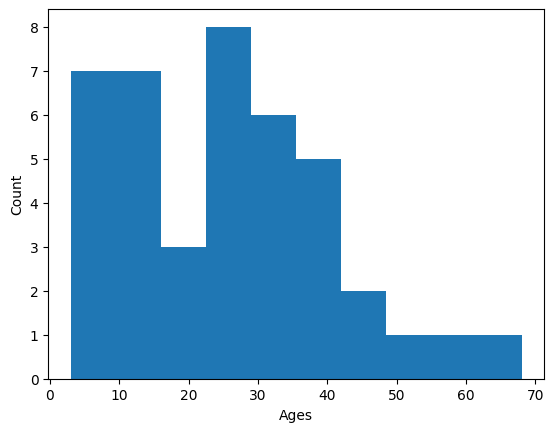

In [ ]:
df['age'].value_counts().plot.hist()
plt.xlabel('Ages')
plt.ylabel('Count')

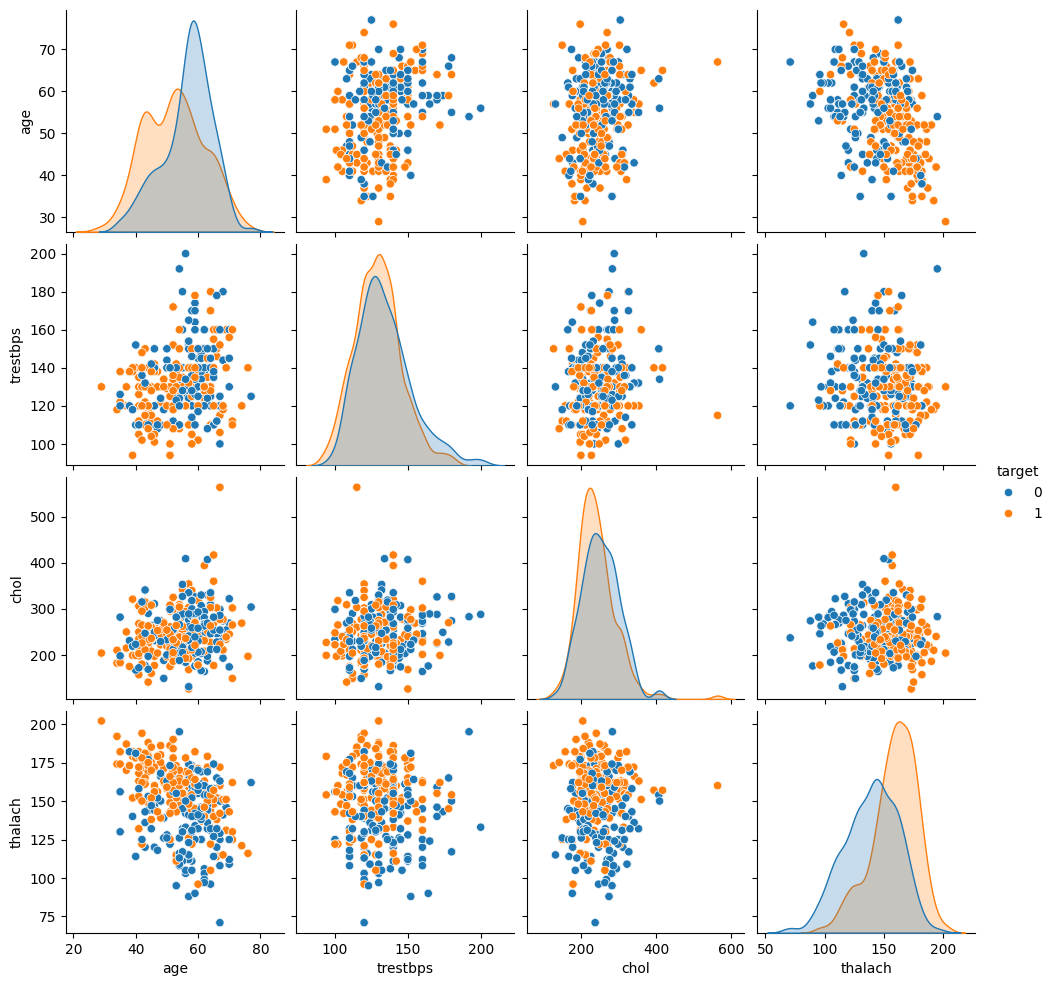

In [ ]:
# Pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target')
plt.show()

**Step 3: Model Implementation**
We'll implement KNN, Naive Bayes, and Decision Tree models.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(205,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [ ]:
knn_predictions = knn.predict(X_test)
knn_predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0])

In [ ]:
y_train_predict_knn = knn.predict(X_train)
y_test_predict_knn = knn.predict(X_test)

In [ ]:
#naivebayes
nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(205,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [ ]:
nb_predictions = nb.predict(X_test)
nb_predictions

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [ ]:
y_train_predict_nbc = nb.predict(X_train)
y_test_predict_nbc = nb.predict(X_test)

In [ ]:
#decision tree
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(205,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [ ]:
dt_predictions = dt.predict(X_test)
dt_predictions

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [ ]:
y_train_predict_dtc = dt.predict(X_train)
y_test_predict_dtc = dt.predict(X_test)

**Step 4: Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


for knn :

In [ ]:
# Convert true labels to binary if needed
y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)

# Convert predictions to binary if needed
y_train_predict_knn_binary = np.where(y_train_predict_knn > 0.5, 1, 0)


In [ ]:
print("KNN Classifier Model Performance: \n")

print("------------------Training Performance:----------------")
print("Accuracy        :", accuracy_score(y_train_binary, y_train_predict_knn_binary))
print("Precision       :", precision_score(y_train_binary, y_train_predict_knn_binary, average='binary'))
print("Recall          :", recall_score(y_train_binary, y_train_predict_knn_binary, average='binary'))
print("f1 Score        :", f1_score(y_train_binary, y_train_predict_knn_binary, average='binary'))
print("ROC AUC Score   :", roc_auc_score(y_train_binary, y_train_predict_knn_binary))
print("Confusion Matrix:\n", confusion_matrix(y_train_binary, y_train_predict_knn_binary))



KNN Classifier Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.5146341463414634
Precision       : 0.5308641975308642
Recall          : 0.508274231678487
f1 Score        : 0.5193236714975846
ROC AUC Score   : 0.5148424055117875
Confusion Matrix:
 [[207 190]
 [208 215]]


In [ ]:
# Convert true labels to binary if needed
y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

# Convert predictions to binary if needed
y_test_predict_knn_binary = np.where(y_test_predict_knn > 0.5, 1, 0)


In [ ]:
print("\n-----------------Testing Performance:-----------------")
print("Accuracy        :", accuracy_score(y_test_binary, y_test_predict_knn_binary))
print("Precision       :", precision_score(y_test_binary, y_test_predict_knn_binary, average='binary'))
print("Recall          :", recall_score(y_test_binary, y_test_predict_knn_binary, average='binary'))
print("f1 Score        :", f1_score(y_test_binary, y_test_predict_knn_binary, average='binary'))
print("ROC AUC Score   :", roc_auc_score(y_test_binary, y_test_predict_knn_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_test_predict_knn_binary))




-----------------Testing Performance:-----------------
Accuracy        : 0.4975609756097561
Precision       : 0.5
Recall          : 0.5145631067961165
f1 Score        : 0.507177033492823
ROC AUC Score   : 0.49747763182943083
Confusion Matrix:
 [[49 53]
 [50 53]]


for naive bayes :

In [ ]:
# Convert true labels to binary if needed
y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

# Convert predictions to binary if needed
y_train_predict_nbc_binary = np.where(y_train_predict_nbc > 0.5, 1, 0)
y_test_predict_nbc_binary = np.where(y_test_predict_nbc > 0.5, 1, 0)


In [ ]:
print("Gaussian Naive Bayes Classifier Model Performance: \n")

print("------------------Training Performance:----------------")
print("Accuracy        :", accuracy_score(y_train_binary, y_train_predict_nbc_binary))
print("Precision       :", precision_score(y_train_binary, y_train_predict_nbc_binary, average='binary'))
print("Recall          :", recall_score(y_train_binary, y_train_predict_nbc_binary, average='binary'))
print("f1 Score        :", f1_score(y_train_binary, y_train_predict_nbc_binary, average='binary'))
print("ROC AUC Score   :", roc_auc_score(y_train_binary, y_train_predict_nbc_binary))
print("Confusion Matrix:\n", confusion_matrix(y_train_binary, y_train_predict_nbc_binary))

print("\n-----------------Testing Performance:-----------------")
print("Accuracy        :", accuracy_score(y_test_binary, y_test_predict_nbc_binary))
print("Precision       :", precision_score(y_test_binary, y_test_predict_nbc_binary, average='binary'))
print("Recall          :", recall_score(y_test_binary, y_test_predict_nbc_binary, average='binary'))
print("f1 Score        :", f1_score(y_test_binary, y_test_predict_nbc_binary, average='binary'))
print("ROC AUC Score   :", roc_auc_score(y_test_binary, y_test_predict_nbc_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_test_predict_nbc_binary))


Gaussian Naive Bayes Classifier Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.55
Precision       : 0.5610859728506787
Recall          : 0.5862884160756501
f1 Score        : 0.5734104046242775
ROC AUC Score   : 0.5488117143350543
Confusion Matrix:
 [[203 194]
 [175 248]]

-----------------Testing Performance:-----------------
Accuracy        : 0.4926829268292683
Precision       : 0.4956521739130435
Recall          : 0.5533980582524272
f1 Score        : 0.5229357798165137
ROC AUC Score   : 0.4923853036360175
Confusion Matrix:
 [[44 58]
 [46 57]]


for decision tree :

In [ ]:
# Convert true labels to binary if needed
y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

# Convert predictions to binary if needed
y_train_predict_dtc_binary = np.where(y_train_predict_dtc > 0.5, 1, 0)
y_test_predict_dtc_binary = np.where(y_test_predict_dtc > 0.5, 1, 0)


In [ ]:
print("Decision Tree Classifier Model Performance: \n")

print("------------------Training Performance:----------------")
print("Accuracy        :", accuracy_score(y_train_binary, y_train_predict_dtc_binary))
print("Precision       :", precision_score(y_train_binary, y_train_predict_dtc_binary, average='binary'))
print("Recall          :", recall_score(y_train_binary, y_train_predict_dtc_binary, average='binary'))
print("f1 Score        :", f1_score(y_train_binary, y_train_predict_dtc_binary, average='binary'))
print("ROC AUC Score   :", roc_auc_score(y_train_binary, y_train_predict_dtc_binary))
print("Confusion Matrix:\n", confusion_matrix(y_train_binary, y_train_predict_dtc_binary))

print("\n-----------------Testing Performance:-----------------")
print("Accuracy        :", accuracy_score(y_test_binary, y_test_predict_dtc_binary))
print("Precision       :", precision_score(y_test_binary, y_test_predict_dtc_binary, average='binary'))
print("Recall          :", recall_score(y_test_binary, y_test_predict_dtc_binary, average='binary'))
print("f1 Score        :", f1_score(y_test_binary, y_test_predict_dtc_binary, average='binary'))
print("ROC AUC Score   :", roc_auc_score(y_test_binary, y_test_predict_dtc_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_test_predict_dtc_binary))


Decision Tree Classifier Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.524390243902439
Precision       : 0.5393794749403341
Recall          : 0.5342789598108747
f1 Score        : 0.5368171021377672
ROC AUC Score   : 0.5240664320464954
Confusion Matrix:
 [[204 193]
 [197 226]]

-----------------Testing Performance:-----------------
Accuracy        : 0.48292682926829267
Precision       : 0.48598130841121495
Recall          : 0.5048543689320388
f1 Score        : 0.4952380952380952
ROC AUC Score   : 0.48281934132876453
Confusion Matrix:
 [[47 55]
 [51 52]]


**Step 5: Cross Validation and Overfitting Check**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import cross_val_score

# Define models if not already defined
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()
dtc_model = DecisionTreeClassifier(random_state=42)

# Define scoring metrics for cross-validation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Function to perform and print cross-validation scores
def cross_validation_scores(model, X, y, scoring_metrics):
    for metric in scoring_metrics:
        cv_scores = cross_val_score(model, X, y, cv=10, scoring=metric)
        print(f"{metric.capitalize()} scores: {cv_scores}")
        print(f"Mean {metric.capitalize()}: {cv_scores.mean()}")
        print(f"Standard Deviation of {metric.capitalize()}: {cv_scores.std()}")
        print()

# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("KNN Model Cross-Validation Scores:")
cross_validation_scores(knn_model, X, y_encoded, scoring_metrics)

print("Naive Bayes Model Cross-Validation Scores:")
cross_validation_scores(nb_model, X, y_encoded, scoring_metrics)

print("Decision Tree Model Cross-Validation Scores:")
cross_validation_scores(dtc_model, X, y_encoded, scoring_metrics)


KNN Model Cross-Validation Scores:
Accuracy scores: [0.91262136 0.86407767 0.87378641 0.80582524 0.82524272 0.8627451
 0.8627451  0.89215686 0.8627451  0.84313725]
Mean Accuracy: 0.860508280982296
Standard Deviation of Accuracy: 0.0290811141687755

Precision scores: [0.95833333 0.89795918 0.88461538 0.82352941 0.81818182 0.83928571
 0.86538462 0.93617021 0.89583333 0.91111111]
Mean Precision: 0.8830404118449442
Standard Deviation of Precision: 0.044320277606778355

Recall scores: [0.86792453 0.83018868 0.86792453 0.79245283 0.8490566  0.90384615
 0.86538462 0.84615385 0.82692308 0.77358491]
Mean Recall: 0.842343976777939
Standard Deviation of Recall: 0.03644747493215181

F1 scores: [0.91089109 0.8627451  0.87619048 0.80769231 0.83333333 0.87037037
 0.86538462 0.88888889 0.86       0.83673469]
Mean F1: 0.861223087288567
Standard Deviation of F1: 0.027935993679101347

Roc_auc scores: [0.97811321 0.96679245 0.97528302 0.9390566  0.95433962 0.97211538
 0.965      0.97365385 0.93173077 0.94